# Task-1
Consider the following dataset and find the outliers using boxplot method. This task must be done manually without using inbuilt method.

```python
[12, 10, 11, 14, 76, 103, 13,15,12,16,17,11,16,25, 110, 20, 23, 27,19, 18,10,13,78, 15,14,20,28,32,87, 23,25,19,22,28,17,27,80,15, 18, 22, 20,25,82,27,21,12,15,18,90,108,28,150]
```

Now, verify the outcome by using the inbuilt function for boxplot method.

# Task-2
Download the following iris dataset and find out the mean, variance, and standard deviation of each of three attributes.

[Iris Species (kaggle.com)](https://www.kaggle.com/datasets/uciml/iris)

Also check for each attribute whether they follow the normal distribution or not by visualizing their data distribution.


# Solution for Task-1

### Step-1
- Import the required modules

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Setp-2
- Define the Functions

In [3]:
def median(data):
    data.sort()
    if len(data) % 2 == 0:
        return (data[len(data)//2] + data[len(data)//2 - 1]) / 2
    else:
        return data[len(data)//2]
    

def Q1(data):
    if len(data) % 2 == 0:
        return median(data[:len(data)//2])
    else:
        return median(data[:len(data)//2])


def Q3(data):
    if len(data) % 2 == 0:
        return median(data[len(data)//2:])
    else:
        return median(data[len(data)//2+1:])


def IQR(data):
    return Q3(data) - Q1(data)


def LL(data):
    return Q1(data) - 1.5 * IQR(data)


def UL(data):
    return Q3(data) + 1.5 * IQR(data)


def Outliers(data):
    return [x for x in data if x < LL(data) or x > UL(data)]

### Step-3
- Sort the data and get the values

In [4]:
data = [12, 10, 11, 14, 76, 103, 13,15,12,16,17,11,16,25, 110, 20, 23, 27,19, 18,10,13,78, 15,14,20,28,32,87, 23,25,19,22,28,17,27,80,15, 18, 22, 20,25,82,27,21,12,15,18,90,108,28,150]
data.sort()
    
print(f"Min: {min(data)}")
print(f"Max: {max(data)}")
print(f"Median: {median(data)}")
print(f"Q1: {Q1(data)}")
print(f"Q3: {Q3(data)}")
print(f"IQR: {IQR(data)}")
print(f"LL: {LL(data)}")
print(f"UL: {UL(data)}")
print(f"Outliers: {Outliers(data)}")

Min: 10
Max: 150
Median: 20.0
Q1: 15.0
Q3: 28.0
IQR: 13.0
LL: -4.5
UL: 47.5
Outliers: [76, 78, 80, 82, 87, 90, 103, 108, 110, 150]


### Step-4
Plot the graph

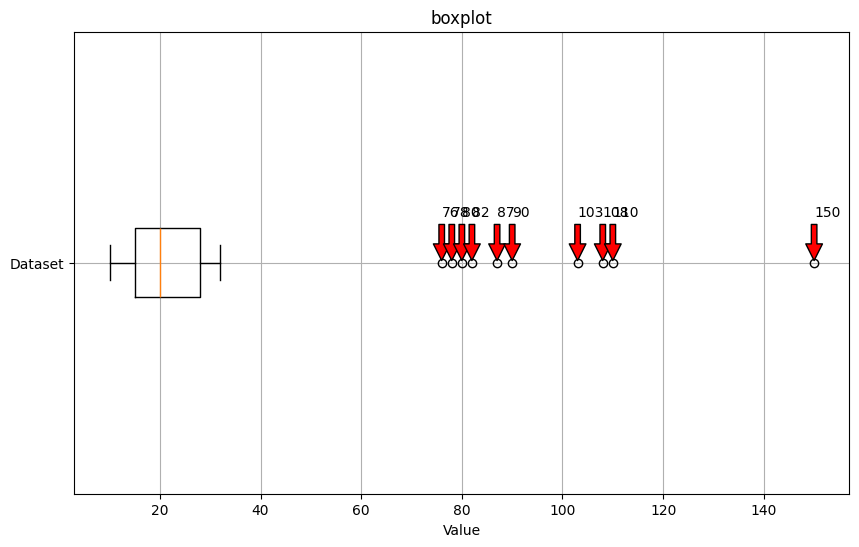

In [5]:
plt.figure(figsize=(10,6))
plt.boxplot(data,vert=False,patch_artist=False)
plt.title("boxplot")
plt.xlabel("Value")
plt.yticks([1],["Dataset"])

for outlier in Outliers(data):
  plt.annotate(str(outlier),xy=(outlier,1),xytext=(outlier,1.1),arrowprops=dict(facecolor='red',shrink=0.05))

plt.grid(True)
plt.show()

### Step-5

- Verify with the inbuilt boxplot function

Outliers: [ 76 103 110  78  87  80  82  90 108 150]


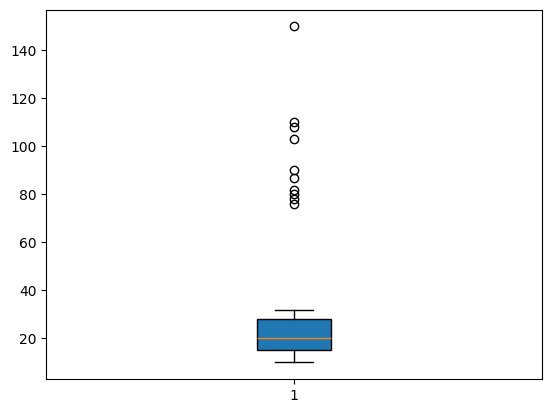

In [6]:
data = np.array([12, 10, 11, 14, 76, 103, 13,15,12,16,17,11,16,25, 110, 20, 23, 27,19, 18,10,13,78, 15,14,20,28,32,87, 23,25,19,22,28,17,27,80,15, 18, 22, 20,25,82,27,21,12,15,18,90,108,28,150])

boxplot_stats = plt.boxplot(data, patch_artist=True)
outliers = boxplot_stats['fliers'][0].get_ydata()

print(f"Outliers: {outliers}")


# Solution for Task-2

- Get the data from [Iris Species (kaggle.com)](https://www.kaggle.com/datasets/uciml/iris)

### Step-1
Load the data & create subplots

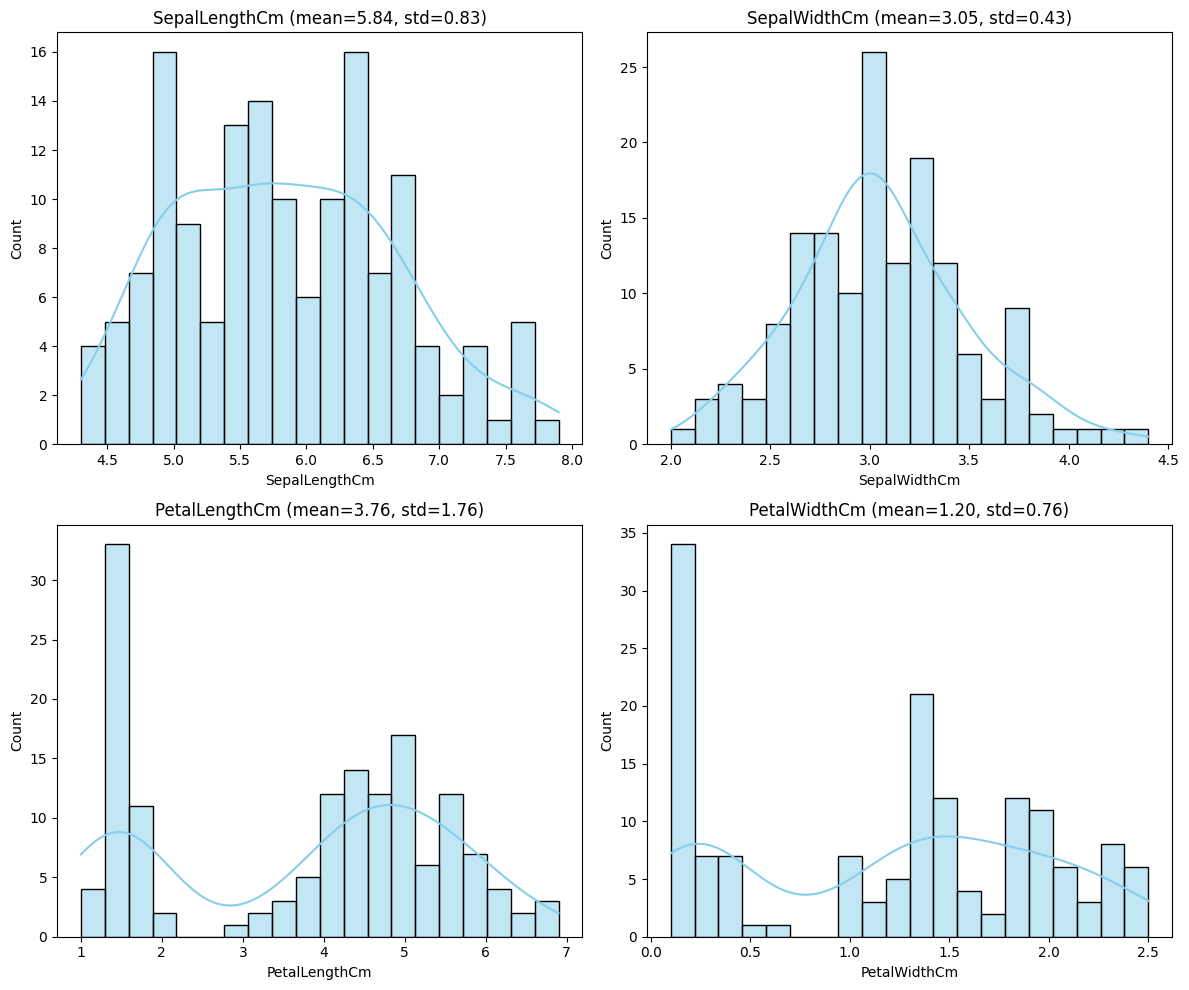

In [8]:
df = pd.read_csv('../Datasets/Week-1/Iris.csv')
columns_to_plot = [col for col in df.columns if col not in ['Species', 'Id']]

num_plots = len(columns_to_plot)
num_rows = int(np.ceil(num_plots / 2))

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{col} (mean={df[col].mean():.2f}, std={df[col].std():.2f})')

for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()